In [206]:
import matplotlib.pyplot as plt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like # path fo is_list_like has been changed
from pandas_datareader import data
import numpy as np
import h5py
import datetime
# import qgrid

In [2]:
from yahoofinancials import YahooFinancials
import pandas as pd

# Select Tickers and stock history dates
ticker = 'AAPL'
ticker2 = 'MSFT'
ticker3 = 'INTC'
index = '^NDX'
freq = 'daily' # 'daily', 'weekly', or 'monthly'
start_date = '2012-10-01'
end_date = '2017-10-01'


# Function to clean data extracts
def clean_stock_data(stock_data_list):
    new_list = []
    for rec in stock_data_list:
        if 'type' not in rec.keys():
            new_list.append(rec)
    return new_list

# daily_aapl_data = clean_stock_data(aapl_financials
#                                      .get_historical_price_data(start_date, end_date, freq)[ticker]['prices'])

# aapl_financials.get_historical_price_data
aapl_financials.get_historical_stock_data(start_date, end_date, freq)[ticker]['prices']

NameError: name 'aapl_financials' is not defined

In [29]:
aapl_financials = YahooFinancials(ticker)
mfst_financials = YahooFinancials(ticker2)
intl_financials = YahooFinancials(ticker3)
index_financials = YahooFinancials(index)

# Clean returned stock history data and remove dividend events from price history
daily_aapl_data = clean_stock_data(aapl_financials.get_historical_stock_data(start_date, end_date, freq)[ticker]['prices'])
daily_msft_data = clean_stock_data(mfst_financials.get_historical_stock_data(start_date, end_date, freq)[ticker2]['prices'])
daily_intl_data = clean_stock_data(intl_financials.get_historical_stock_data(start_date, end_date, freq)[ticker3]['prices'])
daily_index_data = index_financials.get_historical_stock_data(start_date, end_date, freq)[index]['prices']
stock_hist_data_list = [{'NDX': daily_index_data}, {'AAPL': daily_aapl_data}, {'MSFT': daily_msft_data},
                        {'INTL': daily_intl_data}]


In [30]:
AAPL = pd.DataFrame(daily_aapl_data)
AAPL.sort_values('date', ascending =True, inplace=True)

In [35]:
AAPL

,adjclose,close,date,formatted_date,high,low,open,volume
1257,83.842476,94.198570,1349098200,2012-10-01,96.678574,93.785713,95.879997,135898700
1256,84.086601,94.472855,1349184600,2012-10-02,95.192856,92.949997,94.544289,156998100
1255,85.375900,95.921425,1349271000,2012-10-03,95.980003,94.661430,94.980003,106070300
1254,84.784653,95.257141,1349357400,2012-10-04,96.321426,95.078575,95.892860,92681400
1253,82.977821,93.227142,1349443800,2012-10-05,95.142860,93.040001,95.028572,148501500
1252,81.144318,91.167145,1349703000,2012-10-08,92.508568,90.872856,92.411430,159498500
1251,80.849312,90.835716,1349789400,2012-10-09,91.498573,89.078575,91.235718,209649300
1250,81.492706,91.558571,1349875800,2012-10-10,92.139999,91.000000,91.391426,127589000
1249,79.863892,89.728569,1349962200,2012-10-11,92.457146,89.728569,92.357140,136520300
1248,80.068604,89.958572,1350048600,2012-10-12,90.768570,89.328575,89.937141,115003700


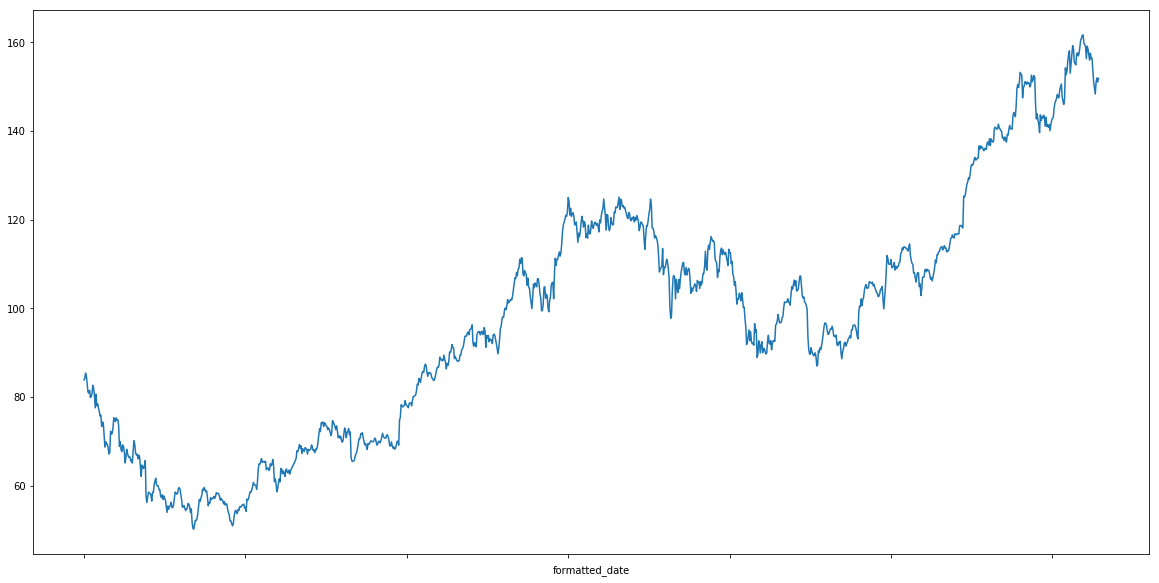

In [31]:
AAPL1 = AAPL.set_index('formatted_date')['adjclose'].plot(figsize=(20,10))
plt.show()

In [4]:
# print(qgrid.show_grid(AAPL, show_toolbar=True))

NameError: name 'qgrid' is not defined

In [43]:
AAPL['formatted_date'][0]

'2017-09-29'

In [6]:
# open, high, low, close?? (keep close, because of p.6 fig.)
AAPL2 = np.array(AAPL[['close', 'high', 'low']])

# normalise by closing price
AAPL_n = AAPL2[1:,:]/AAPL2[:-1,:]

def close_high_low(df):
    return np.array(df[['close', 'high', 'low']])

def normalise_price(nparray):
    return nparray[1:,:]/nparray[:-1,:]


In [7]:
data_in = [daily_aapl_data, daily_msft_data ,daily_intl_data, daily_index_data]
data_out = []

for data in data_in:
    temp = pd.DataFrame(data)
    temp.sort_values('date', ascending =True, inplace=True)
    temp = close_high_low(temp)
    temp = normalise_price(temp)
    data_out.append(temp)

In [61]:
a = np.stack(data_out)
b = np.swapaxes(a, 0,2)
b.shape # highlowclose, time, asset

(3, 1257, 4)

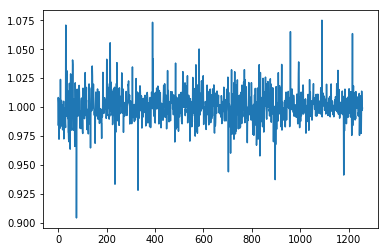

In [60]:
plt.plot(b[1,:,0])
plt.show()

# Get Multiple Stocks

Fact Sheet of IFSL Ravenscroft Huntress Global Blue Chip Fund
http://funds.ifslfunds.com/uploads/documents/15079082705135a52f4be1ce7733eafaa45ce508cf655.pdf

## HUNTRESS GLOBAL BLUE CHIP PORTFOLIO
### GLOBAL BRANDS & EMERGING ECONOMIES
Unilever 5.0% (the company is listed in 4 markets)
Diageo 4.2% (listed in multiple markets)
Walt Disney 4.1%
Kimberly-Clark 4.1%
Nestlé 4.2%
Richmont 3.2%
Procter & Gamble 3.0%
L’Oreal 2.9%
PepsiCo 2.8%
LVMH 2.6%
Colgate 2.4%
### HEALTHCARE
Johnson & Johnson 4.7%
Novartis 5.0%
Roche 5.3%
Sanofi 5.4%
Medtronic 4.7%
Amgen 3.1%
### TECHNOLOGY & INNOVATION
RELX 4.0%
Honeywell 4.0%
Intel 4.2%
Apple 3.5%
General Electric 4.0%
Microsoft 3.5%
3M 2.9%
Rolls- Royce 2.4%
### Cash
Cash 4.8%
### Totals 100%




In [60]:
global_brands_and_emerging_economies = ['UL', 'DEO', 'DIS', 'KMB',
                                        'NSRGY', 'RIC', 'PG', 'LRLCY',
                                       'PEP','LVMUY','CL']
data = []

# RIC seems not working
for ticket in global_brands_and_emerging_economies:
    data.append(YahooFinancials(ticket))
    print(ticket)

UL
DEO
DIS
KMB
NSRGY
RIC
PG
LRLCY
PEP
LVMUY
CL


In [24]:
price = data[0].get_historical_price_data(start_date, end_date, freq)

In [28]:
pd.DataFrame(clean_stock_data(price['UL']['prices']))

,adjclose,close,date,formatted_date,high,low,open,volume
0,30.165630,36.680000,1349098200,2012-10-01,36.889999,36.599998,36.770000,911400
1,30.182079,36.700001,1349184600,2012-10-02,36.799999,36.599998,36.660000,1037600
2,30.239643,36.770000,1349271000,2012-10-03,36.889999,36.709999,36.750000,579500
3,30.585056,37.189999,1349357400,2012-10-04,37.200001,36.970001,37.049999,1530400
4,30.815319,37.470001,1349443800,2012-10-05,37.590000,37.369999,37.450001,750500
5,30.839998,37.500000,1349703000,2012-10-08,37.549999,37.230000,37.250000,2573500
6,30.305431,36.849998,1349789400,2012-10-09,37.240002,36.849998,37.209999,1687800
7,30.256090,36.790001,1349875800,2012-10-10,37.080002,36.740002,36.840000,1103500
8,30.371235,36.930000,1349962200,2012-10-11,37.080002,36.880001,37.000000,968200
9,30.511028,37.099998,1350048600,2012-10-12,37.299999,37.040001,37.220001,874000


In [204]:
def download_price_data(path, ticker, freq, start_date, end_date, sort_by_date_ascending):
    yf = YahooFinancials(ticker)
    price_data = clean_stock_data(yf.get_historical_stock_data(start_date, end_date, freq)[ticker]['prices'])
    pd_price_data = pd.DataFrame(price_data)
    print("The downloaded price data has shape" + str(pd_price_data.shape))
    
    retrieved_at = updated_at = str(datetime.now())[:10]
    
    if sort_by_date_ascending:
        pd_price_data.sort_values('date', ascending =True, inplace=True)
    
    file = path + ticker + '.h5'
    pd_price_data.to_hdf(file, key = 'df', mode = 'w')
    print("Price data is saved.")
    
    pd.Series(ticker).to_hdf(file, key = 'ticker')
    pd.Series(freq).to_hdf(file, key = 'freq')
    pd.Series(start_date).to_hdf(file, key = 'start_date')
    pd.Series(end_date).to_hdf(file, key = 'end_date')
    pd.Series(sort_by_date_ascending).to_hdf(file, key = 'sort_by_date_ascending')
    pd.Series(start_date).to_hdf(file, key = 'start_date')
    pd.Series(end_date).to_hdf(file, key = 'end_date')
    pd.Series(retrieved_at).to_hdf(file, key = 'retrieved_at')
    pd.Series(updated_at).to_hdf(file, key = 'updated_at')

    
#     pd.Series(ticker).to_hdf(file, key = 'ticker')

    
#     with h5py.File(file, 'w') as store:
#         store.attrs['ticker'] = [ticker.encode('UTF-8')]
#         store.attrs['freq'] = [freq.encode('UTF-8')]  # 'daily', 'weekly', or 'monthly'
#         store.attrs['start_date'] = [start_date.encode('UTF-8')]
#         store.attrs['end_date'] = [end_date.encode('UTF-8')]
#         store.attrs['sort_by_date_ascending'] = [sort_by_date_ascending]
#         store.attrs['retrieved_at'] = [str(datetime.now())[:10].encode('UTF-8')]# format: '2018-10-01'
#         store.attrs['updated_at'] = [str(datetime.now())[:10].encode('UTF-8')] 
np.string_("hello world").decode('UTF-8') #'2018-10-01'
'hello world'

'hello world'

In [205]:
download_price_data(path='../data/raw/', ticker='DEO', freq = 'daily',
                    start_date = start_date, end_date = end_date,
                    sort_by_date_ascending=True)

The downloaded price data has shape(1258, 8)
Price data is saved.


In [200]:
path='../data/raw/'
ticker='DEO'
file = path + ticker + '.h5'
df = pd.read_hdf(file, 'df')
ticker = pd.read_hdf(file, 'ticker')
# with pd.read_hdf(file) as r:
#     print(r)
# print(file)
ticker = ticker.append(pd.Series(['hello']), ignore_index=True)
ticker = ticker.append(pd.Series(['hello']), ignore_index=True)

ticker.iloc[-1]
# ticker[2]

'hello'

In [201]:
with h5py.File(file, 'r') as r:
    print(list(r.keys()))

['df', 'end_date', 'freq', 'retrieved_at', 'sort_by_date_ascending', 'start_date', 'ticker', 'updated_at']


In [94]:
r = h5py.File(file, 'r')
a = r.get('updated_at')
print(a)
r.close()

<HDF5 group "/updated_at" (2 members)>


In [207]:
def update_price_data(path, ticker, _start_date = '2009-10-01', _end_date = str(datetime.datetime.now())[:10]):
    file = path + ticker + '.h5'

    start_date_DT = datetime.datetime.strptime(pd.read_hdf(file, 'start_date').iloc[-1], '%Y-%m-%d')
    end_date_DT = datetime.datetime.strptime(pd.read_hdf(file, 'end_date').iloc[-1], '%Y-%m-%d')
    _start_date_DT = datetime.datetime.strptime(_start_date, '%Y-%m-%d')
    _end_date_DT = datetime.datetime.strptime(_end_date, '%Y-%m-%d')
    
    df = pd.read_hdf(file, 'df')

    sort_by_date_ascending = pd.read_hdf(file, 'sort_by_date_ascending').iloc[-1]

    if _start_date_DT < start_date_DT:
        yf = YahooFinancials(ticker)
        END = str(start_date_DT - datetime.timedelta(days=1))[:10]
        price_data = clean_stock_data(yf.get_historical_stock_data(_start_date, END, freq)[ticker]['prices'])
        pd_price_data = pd.DataFrame(price_data)
        print("The downloaded price data has shape" + str(pd_price_data.shape))
        df = df.append(pd_price_data, ignore_index=True)
    
    if _end_date_DT > end_date_DT:
        yf = YahooFinancials(ticker)
        START = str(end_date_DT + datetime.timedelta(days=1))[:10]
        price_data = clean_stock_data(yf.get_historical_stock_data(START, _end_date, freq)[ticker]['prices'])
        pd_price_data = pd.DataFrame(price_data)
        print("The downloaded price data has shape" + str(pd_price_data.shape))
        df = df.append(pd_price_data, ignore_index=True)
        
    if sort_by_date_ascending:
        df.sort_values('date', ascending =True, inplace=True)
    
    df.to_hdf(file, key = 'df', mode = 'w')
    pd.Series(_start_date).to_hdf(file, key = 'start_date')
    pd.Series(_end_date).to_hdf(file, key = 'end_date')
    pd.Series(_end_date).to_hdf(file, key = 'end_date')
    
    updated_at = str(datetime.datetime.now())[:10]
    pd.Series(updated_at).to_hdf(file, key = 'updated_at')
    print("Price data is updated")

ddddd = update_price_data(path='../data/raw/', ticker='DEO')

The downloaded price data has shape(757, 8)
The downloaded price data has shape(251, 8)


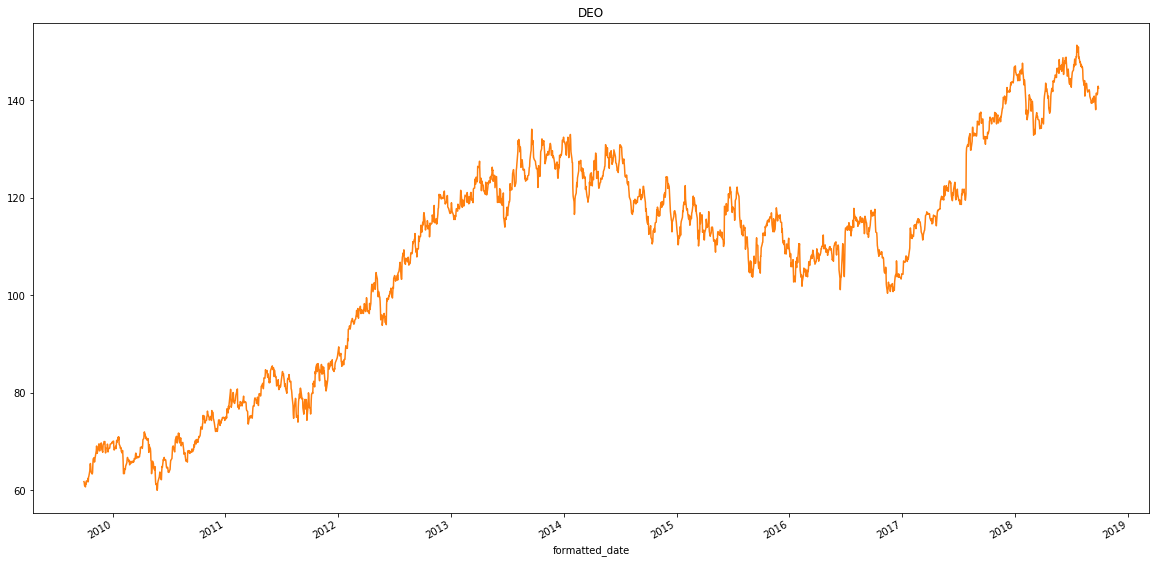

In [224]:
path='../data/raw/'
ticker='DEO'
file = path + ticker + '.h5'
df = pd.read_hdf(file, 'df')
df.index = pd.to_datetime(df['formatted_date'])
df['high'].plot(figsize= (20,10), title=ticker)
plt.show()

In [217]:
df

,adjclose,close,date,formatted_date,high,low,open,volume
date,,,,,,,,
1254317400,46.668835,61.490002,1254317400,2009-09-30,61.790001,60.709999,61.570000,488700
1254403800,46.441139,61.189999,1254403800,2009-10-01,61.610001,60.910000,61.450001,774000
1254490200,46.137558,60.790001,1254490200,2009-10-02,61.000000,60.000000,60.000000,1185000
1254749400,46.076843,60.709999,1254749400,2009-10-05,60.709999,60.049999,60.250000,610200
1254835800,46.517044,61.290001,1254835800,2009-10-06,61.459999,60.840000,60.990002,612100
1254922200,46.463913,61.220001,1254922200,2009-10-07,61.290001,60.810001,60.990002,664100
1255008600,46.866161,61.750000,1255008600,2009-10-08,61.939999,61.490002,61.660000,699700
1255095000,46.820625,61.689999,1255095000,2009-10-09,61.750000,61.240002,61.310001,681500
1255354200,46.706776,61.540001,1255354200,2009-10-12,61.840000,61.450001,61.790001,412200


In [203]:
do = datetime.strptime('2018-10-01', '%Y-%m-%d')
do1 = datetime.strptime('2018-11-01', '%Y-%m-%d')

do >= do1
datetime.datetime.now()

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'